# Bike Sharing Case Study

## Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

In [3]:
bikeSharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikeSharing.shape

(730, 16)

In [6]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
print(bikeSharing.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


There's no missing value in dataset

category_features = ['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']

number_features = ['temp', 'atemp', 'hum', 'windspeed']

In [9]:
#Let's convert the datatype of dteday column to datetime.¶
bikeSharing['dteday'] =  pd.to_datetime(bikeSharing['dteday'],format='%d-%m-%Y')
bikeSharing['dteday'].dtype


dtype('<M8[ns]')

### Extracting the Year and Month from the Date¶

In [10]:
bikeSharing['year'] = pd.DatetimeIndex(bikeSharing['dteday']).year
bikeSharing['month'] = pd.DatetimeIndex(bikeSharing['dteday']).month


In [11]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [12]:
## Dropping the columns as we have extracte#d the correct year and month from the date.

bikeSharing.drop(['yr','mnth'],axis=1,inplace=True)

# Dropping the dteday,instant,casual and registered columns.

bikeSharing.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [13]:
#Dropping the redundant variable holiday as the workingday column provides enough information that is required.

bikeSharing.drop('holiday',axis=1,inplace=True)

In [14]:
bikeSharing.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'year', 'month'],
      dtype='object')

## Step 2: Encoding the Labels and Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [16]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikeSharing['season'] = bikeSharing['season'].map(codes)

In [17]:
bikeSharing.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


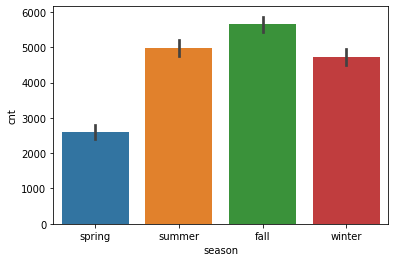

In [18]:
sns.barplot('season','cnt',data=bikeSharing)

Bike Rentals are more during the Fall season.

weathersit : 
		 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikeSharing['weathersit'] = bikeSharing['weathersit'].map(codes)

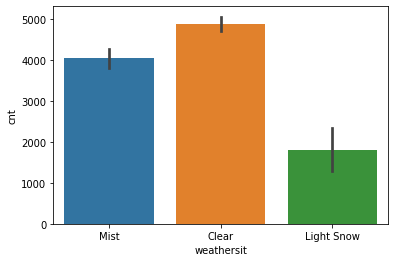

In [20]:
sns.barplot('weathersit','cnt',data=bikeSharing)

Bikes seems to be rented more when weather was little pleasant, partly cloudy

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [21]:
codes = {1:'working_day',0:'Holiday'}
bikeSharing['workingday'] = bikeSharing['workingday'].map(codes)

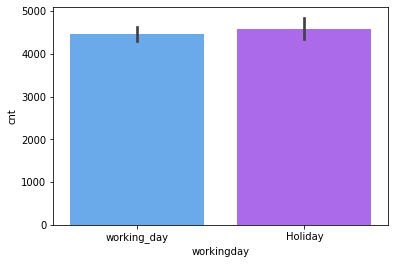

In [22]:
sns.barplot('workingday','cnt',data=bikeSharing,palette='cool')

Bikes seem to be rented more on working days.

yr : year (0: 2018, 1:2019)

In [23]:
codes = {2019:1,2018:0}
bikeSharing['year'] = bikeSharing['year'].map(codes)


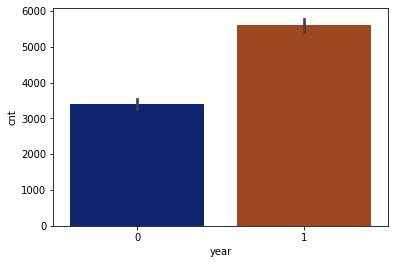

In [24]:
sns.barplot('year','cnt',data=bikeSharing,palette='dark')

The popularity of Bike Rental has increased in 2019 when compared to 2018.

mnth : month ( 1 to 12)

In [25]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikeSharing['month'] = bikeSharing['month'].map(codes)

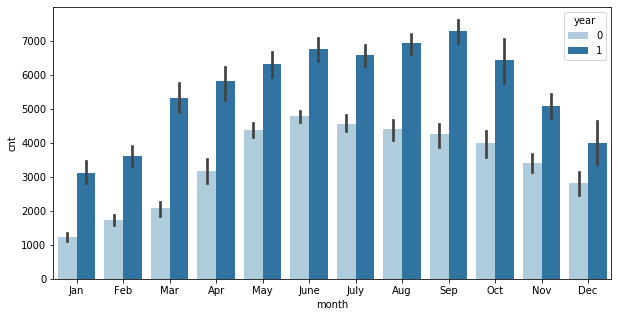

In [26]:
plt.figure(figsize=(10,5))
sns.barplot('month','cnt',hue='year',data=bikeSharing,palette='Paired')

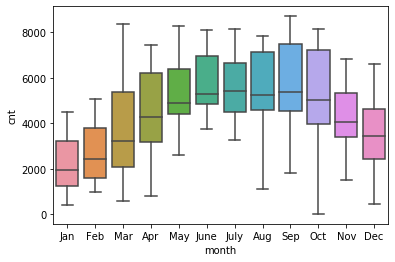

In [27]:
sns.boxplot(data=bikeSharing,y="cnt",x="month",orient="v")

WeekDay

0:Mon
1:Tue
2:Wed
3:Thu
4:Fri
5:Sat
6:Sun

In [28]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikeSharing['weekday'] = bikeSharing['weekday'].map(codes)

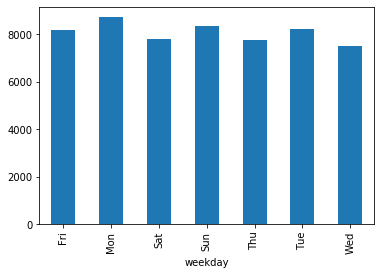

In [29]:
bikeSharing.groupby('weekday')['cnt'].max().plot(kind='bar')

Bike Rentals are maximum on Sunday and Monday

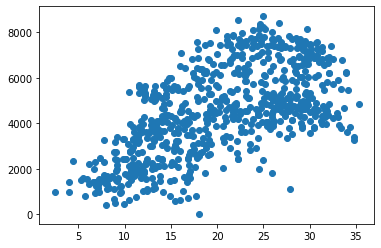

In [30]:
# scatter plot with temperature
plt.scatter('temp','cnt',data=bikeSharing)

Bike Rentals are observed at higher temperatures.

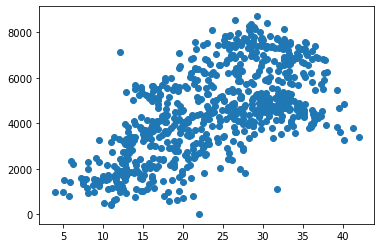

In [31]:
#scatter plot with atemp
plt.scatter('atemp','cnt',data=bikeSharing)

Bike Rentals are observed at higher "feel-like" temperatures.

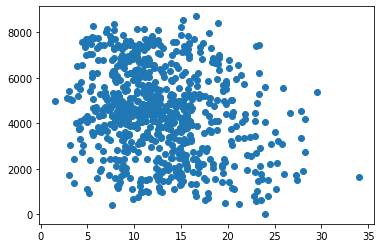

In [32]:
#scatter plot with windspeed
plt.scatter('windspeed','cnt',data=bikeSharing)

In [33]:
bikeSharing.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'year', 'month'],
      dtype='object')

## Step 3: Visualising the relationship between variable

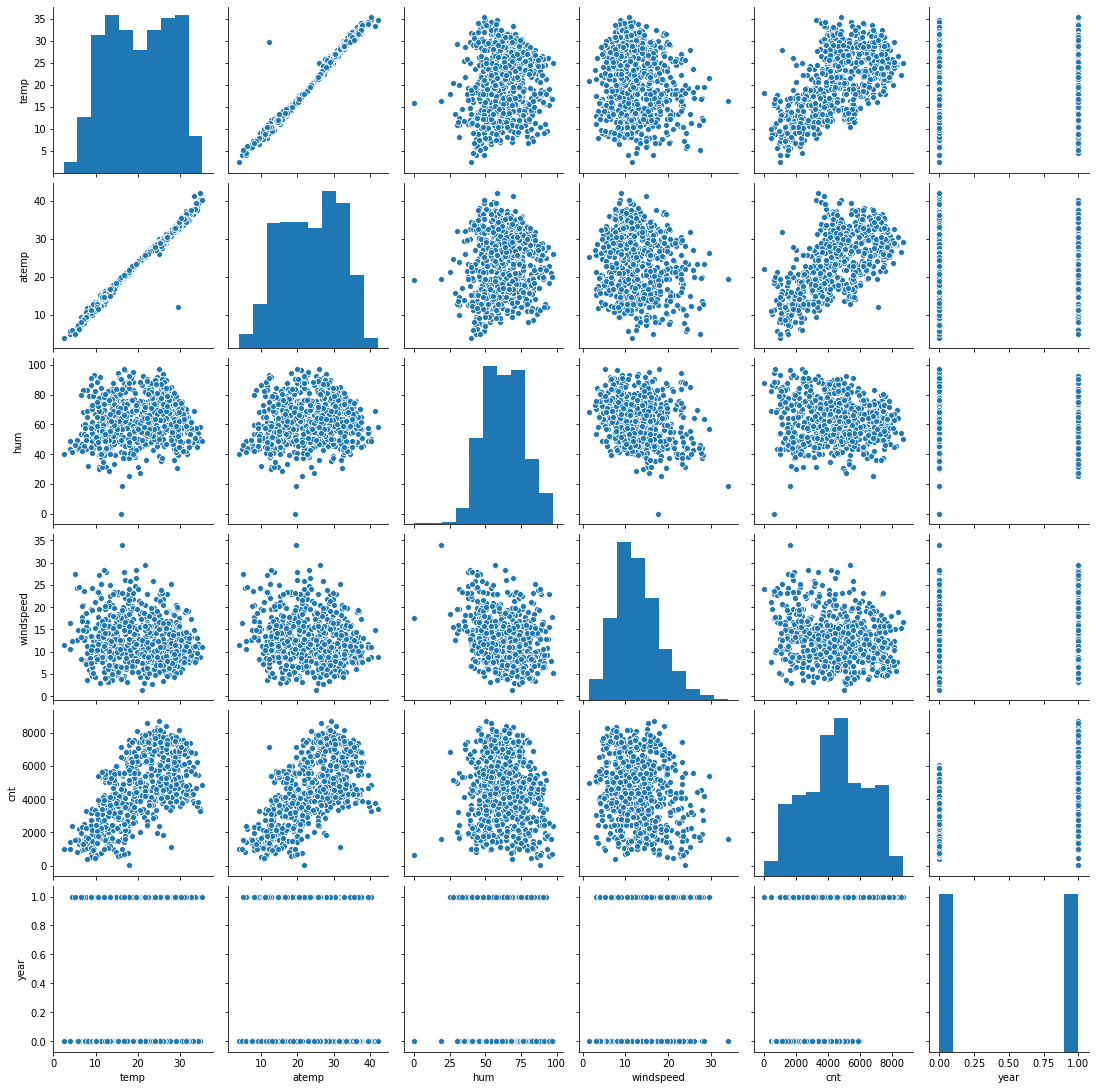

In [34]:
sns.pairplot(bikeSharing)


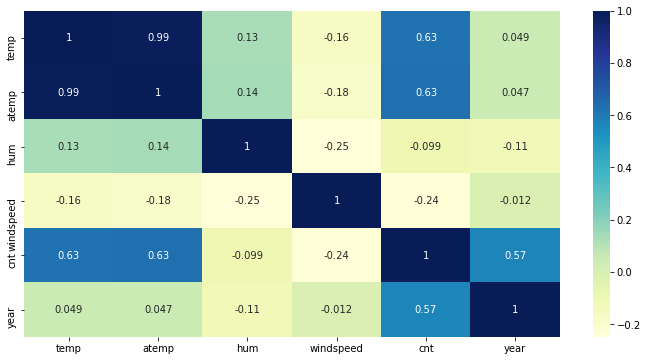

In [35]:
plt.figure(figsize = (12,6))
sns.heatmap(bikeSharing.corr(),annot=True, cmap="YlGnBu")

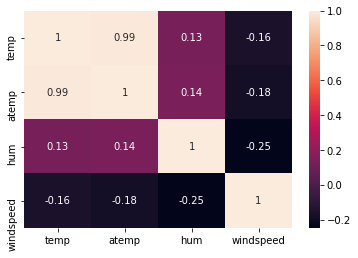

In [36]:
data= bikeSharing[['temp','atemp','hum','windspeed']]
sns.heatmap(data.corr(),annot=True)


Per observation from above graph, it seems like temp and atemp are highly correlated.
Dropping atemp

In [37]:
bikeSharing.drop('atemp',axis=1,inplace=True)

In [38]:
bikeSharing.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'cnt', 'year', 'month'],
      dtype='object')

## Step 4: Categorical variables and data prep

In [39]:
seasons = pd.get_dummies(bikeSharing['season'],drop_first=True)

working_day = pd.get_dummies(bikeSharing['workingday'],drop_first=True)

weather= pd.get_dummies(bikeSharing['weathersit'],drop_first=True)

month= pd.get_dummies(bikeSharing['month'],drop_first=True)

week_day= pd.get_dummies(bikeSharing['weekday'],drop_first=True)

In [40]:
bikeSharing= pd.concat([bikeSharing,seasons,working_day,weather,month,week_day],axis=1)

In [41]:
bikeSharing.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [42]:
# Dropping the categorical variables as they are already dummy-encoded.

bikeSharing.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [43]:
bikeSharing.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
bikeSharing.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'year', 'spring', 'summer', 'winter',
       'working_day', 'Light Snow', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

## Step 5: Splitting the data in Train and Test Sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
bikeSharing_df = bikeSharing.copy()

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(bikeSharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])


In [50]:
outcome = 'cnt'

y_train = df_train.pop(outcome)
X_train = df_train

In [51]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

## Step 6: Builiding the linear model

Using Recursive feature elimination(RFE)

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

In [54]:
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', False, 2),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 15),
 ('Sep', False, 3),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'working_day',
       'Light Snow', 'July', 'Mon', 'Sun'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

## Step 7: Builiding the data frame for detailed statistics

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.22e-176
Time:                        00:14:44   Log-Likelihood:                 470.03
No. Observations:                 510   AIC:                            -918.1
Df Residuals:                     499   BIC:                            -871.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3563      0.042      8.520      

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.17
6,working_day,9.87
9,Mon,6.39
10,Sun,6.14
1,temp,1.95
5,spring,1.65
8,July,1.25
2,hum,1.23
3,windspeed,1.14
7,Light Snow,1.11


In [63]:
#Dropping Sun from train set as high VIF and P value

X_train_new = X_train_rfe.drop(["working_day"], axis = 1)

Rebuilding the model without `working_day`

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [65]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.88e-176
Time:                        00:14:44   Log-Likelihood:                 467.30
No. Observations:                 510   AIC:                            -914.6
Df Residuals:                     500   BIC:                            -872.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4244      0.030     14.185      0.0

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.78
1,temp,1.95
5,spring,1.64
7,July,1.25
2,hum,1.23
3,windspeed,1.14
6,Light Snow,1.11
4,year,1.03
8,Mon,1.03
9,Sun,1.03


In [68]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'year', 'spring', 'Light Snow',
       'July', 'Mon', 'Sun'],
      dtype='object')

In [69]:
X_train_new = X_train_new.drop(["Mon"], axis = 1)

In [70]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'year', 'spring', 'Light Snow',
       'July', 'Sun'],
      dtype='object')

In [71]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     273.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.42e-177
Time:                        00:14:44   Log-Likelihood:                 466.58
No. Observations:                 510   AIC:                            -915.2
Df Residuals:                     501   BIC:                            -877.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4266      0.030     14.280      0.0

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.59
1,temp,1.95
5,spring,1.64
7,July,1.25
2,hum,1.23
3,windspeed,1.14
6,Light Snow,1.11
4,year,1.03
8,Sun,1.00


In [73]:
X_train_new = X_train_new.drop(["Sun"], axis = 1)

In [74]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.34e-178
Time:                        00:14:44   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4277      0.030     14.348      0.0

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.45
1,temp,1.95
5,spring,1.64
7,July,1.25
2,hum,1.23
3,windspeed,1.14
6,Light Snow,1.10
4,year,1.03


All the variables have VIF less than 5 and P value is also 0

In [76]:
X_train_new = X_train_new.drop(['const'], axis=1)

## Step 8: Residual analysis of train data

In [77]:
y_train_bike = lm.predict(X_train_lm)

In [78]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

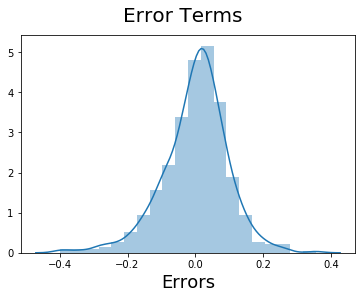

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 9: Making Predictions

In [80]:
# Apply scaler() 
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0.837241,0.534223,0.149393,0.704300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
535,0.911423,0.470417,0.231142,0.725421,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0.496221,0.777843,0.443398,0.278853,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
221,0.890387,0.236659,0.449707,0.545512,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0.821739,0.070765,0.682387,0.569148,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Dividing into X_test and y_test



In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
X_train_new.columns

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'Light Snow', 'July'], dtype='object')

In [83]:
X_test.columns

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'summer', 'winter',
       'working_day', 'Light Snow', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

In [84]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [85]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [87]:
y_test.shape

(219,)

## Step 10: Model Evaluation

Text(0, 0.5, 'y_pred')

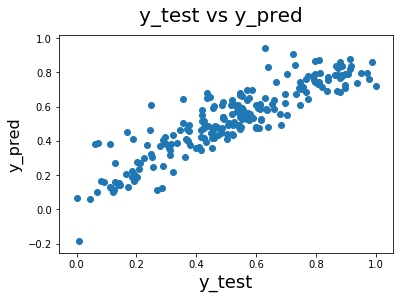

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)



In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7994090989883661

Text(0, 0.5, 'Views')

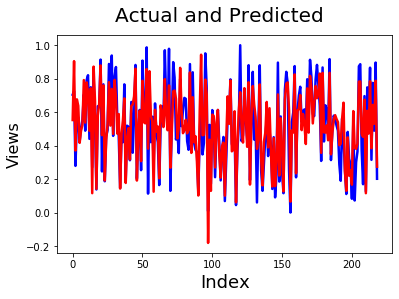

In [90]:
c = [i for i in range(0,219,1)]
fig = plt.figure()
plt.plot(c,y_test.to_frame(), color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred.to_frame(), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               